# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [47]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import brfss

import thinkstats2
import thinkplot

## Exercises

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [48]:
df = brfss.ReadBrfss(nrows=None)

def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [49]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [54]:
ages=live.agepreg
weights=live.totalwgt_lb
Pearson=Corr(ages,weights)
Spearman=SpearmanCorr(ages,weights)
print("Pearson's Corr:", Pearson)
print("SpearmanCorr:", Spearman)


Pearson's Corr: 0.06883397035410911
SpearmanCorr: 0.09461004109658226


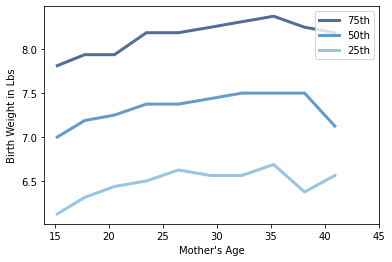

In [51]:
def Percentiles(df):
    bins=np.arange(10,48,3)
    indices=np.digitize(df.agepreg, bins)
    groups=df.groupby(indices)

    ages=[group.agepreg.mean() for i, group in groups][1:-1]
    cdfs=[thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]
    
    thinkplot.PrePlot(3)
    for percent in [75,50,25]:
        weights=[cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)
        
        thinkplot.Config(xlabel="Mother's Age",
                         ylabel="Birth Weight in Lbs",
                         xlim=[14, 45],legend=True)

Percentiles(live)

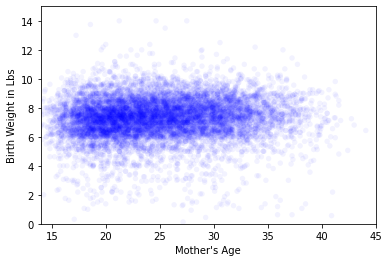

In [52]:
def ScatterPlot(ages,weights,alpha=1.0,s=20):
    thinkplot.Scatter(ages,weights, alpha=alpha)
    thinkplot.Config(xlabel="Mother's Age",ylabel="Birth Weight in Lbs",xlim=[14,45],ylim=[0,15],legend=False)
    
ScatterPlot(ages,weights,alpha=0.05,s=10)

In [ ]:
# The relationship between Mother's age and birth weight is somewhat difficult to see clearly on the scatter plot 
# but the relationship appears to be weak.

# Both the Spearman and Pearson Correlations confirm this with the Pearson Correlation being roughly 0.07 
# and the Spearman being roughly 0.09.

# Plotting the percentiles of age vs weight shows the relationship is likely non-linear. 
# The Percentile plot also shows that birth weight increase quickly for mother's aged 

## Chapter 8 Exercises

In [8]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [9]:
import random

def Estimate(n=7,iters=100000):
    mu = 0
    sigma = 1
    
    means=[]
    medians=[]
    for _ in range(iters):
        xs=[random.gauss(mu,sigma) for i in range(n)]
        xbar=np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    
    print("Experiment One")
    print("Mean Error Xbar",MeanError(means,mu))
    print("Mean Error Median",MeanError(medians,mu))

Estimate()

Experiment One
Mean Error Xbar -0.0008739039491084705
Mean Error Median -0.0014897694613251811


In [10]:
def Estimate2(n=7,iters=100000):
    mu=0
    sigma=1
    estimates_biased=[]
    estimates_unbiased=[]
    for _ in range(iters):
        xs=[random.gauss(mu,sigma) for i in range(n)]
        biased=np.var(xs)
        unbiased=np.var(xs, ddof=1)
        estimates_biased.append(biased)
        estimates_unbiased.append(unbiased)

    print("Experiment Two")
    print("Biased", RMSE(estimates_biased,sigma**2))
    print("Unbiased", RMSE(estimates_unbiased,sigma**2))

Estimate2()

Experiment Two
Biased 0.515168834793704
Unbiased 0.5775038034305193


In [11]:
# Xbar and Median both yield lower MSE as m increases which shows that neither measurement is obviously biased.

#The biased RMSE is lower than the unbiased RMSE by about 10%.

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [12]:
def SimulateSample(n=10,iters=1000,lam=2):
    def Vrtline(x, y=1):
        thinkplot.Plot([x,x],[0,y],linewidth=3,color="0.8")

    estimates=[]
    for _ in range(iters):
        xs=np.random.exponential(1.0/lam, n)
        lamhat = 1.0/np.mean(xs)
        estimates.append(lamhat)
    
    stderr=RMSE(estimates,lam)
    print("Stnd Error:", stderr)
    
    cdf=thinkstats2.Cdf(estimates)
    ci=cdf.Percentile(5),cdf.Percentile(95)
    print("Confidence Interval", ci)
    Vrtline(ci[0])
    Vrtline(ci[1])

    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel="estimate",ylabel="CDF",title="Sample Distribution")
    
    return stderr

SimulateSample()

Stnd Error: 0.8180041044035181


NameError: name 'thinkstats2' is not defined

In [ ]:
SimulateSample(n=50,iters=1000,lam=2)

In [ ]:
SimulateSample(n=100,iters=1000,lam=2)

In [103]:
# When n=10 
# Stnd Error: 0.8759039372708906
# Confidence Interval (1.2436205654425407, 3.724028603303434)

#As n increase, the CI width and Stnd error decrease. All the Confidence intervals contain 2.

In [ ]:
## Chapter 8 Exercises

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

import random

def Estimate(n=7,iters=100000):
    mu = 0
    sigma = 1
    
    means=[]
    medians=[]
    for _ in range(iters):
        xs=[random.gauss(mu,sigma) for i in range(n)]
        xbar=np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    
    print("Experiment One")
    print("Mean Error Xbar",MeanError(means,mu))
    print("Mean Error Median",MeanError(medians,mu))

Estimate()

def Estimate2(n=7,iters=100000):
    mu=0
    sigma=1
    estimates_biased=[]
    estimates_unbiased=[]
    for _ in range(iters):
        xs=[random.gauss(mu,sigma) for i in range(n)]
        biased=np.var(xs)
        unbiased=np.var(xs, ddof=1)
        estimates_biased.append(biased)
        estimates_unbiased.append(unbiased)

    print("Experiment Two")
    print("Biased", RMSE(estimates_biased,sigma**2))
    print("Unbiased", RMSE(estimates_unbiased,sigma**2))

Estimate2()

# Xbar and Median both yield lower MSE as m increases which shows that neither measurement is obviously biased.

#The biased RMSE is lower than the unbiased RMSE by about 10%.

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



def SimulateSample(n=10,iters=1000,lam=2):
    def Vrtline(x, y=1):
        thinkplot.Plot([x,x],[0,y],linewidth=3,color="0.8")

    estimates=[]
    for _ in range(iters):
        xs=np.random.exponential(1.0/lam, n)
        lamhat = 1.0/np.mean(xs)
        estimates.append(lamhat)
    
    stderr=RMSE(estimates,lam)
    print("Stnd Error:", stderr)
    
    cdf=thinkstats2.Cdf(estimates)
    ci=cdf.Percentile(5),cdf.Percentile(95)
    print("Confidence Interval", ci)
    Vrtline(ci[0])
    Vrtline(ci[1])

    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel="estimate",ylabel="CDF",title="Sample Distribution")
    
    return stderr

SimulateSample()

SimulateSample(n=50,iters=1000,lam=2)

SimulateSample(n=100,iters=1000,lam=2)

# When n=10 
# Stnd Error: 0.8759039372708906
# Confidence Interval (1.2436205654425407, 3.724028603303434)

#As n increase, the CI width and Stnd error decrease. All the Confidence intervals contain 2.